# Pandas 시각화
판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ser.plot(kind='bar')
ser.plot.bar()

NameError: name 'ser' is not defined

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

matplotlib를 이용해 여러 설정들 가능

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [5]:
tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

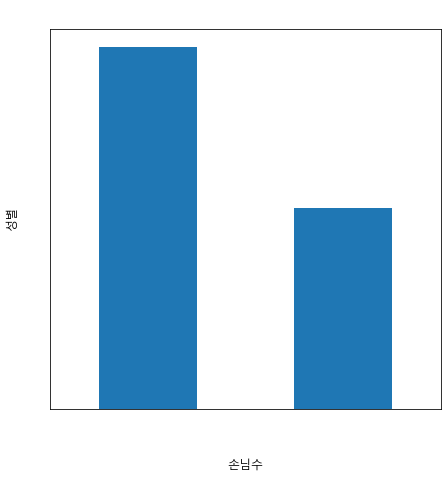

In [6]:
# 성별: 남성, 여성의 수
# plt.figure(figsize=(10,10))
tips['sex'].value_counts().plot(kind='bar',figsize=(7,7))
# Series.bar(): index가 x축, value가 Y축

plt.title('성별 손님수')
plt.xlabel('손님수')
plt.ylabel('성별')
plt.show()

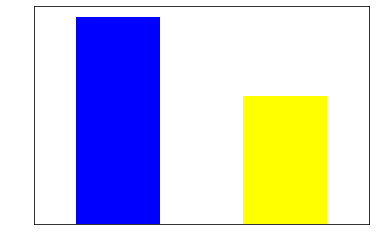

In [7]:
sm = tips['smoker'].value_counts()
sm.plot.bar(color=['blue','yellow'], rot=0)
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.

<AxesSubplot:xlabel='smoker'>

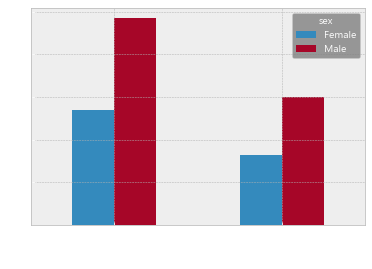

In [15]:
import matplotlib as mpl
mpl.style.use('bmh')
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'white'
agg_df = tips.pivot_table(index='smoker', columns='sex', values='tip', aggfunc='count')

agg_df.plot.bar()

<AxesSubplot:xlabel='day'>

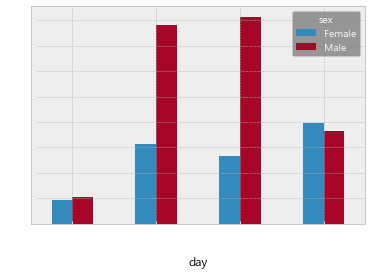

In [9]:
# 요일(day)-성별(sex) 손님의 총수(size)
# DF의 index: ticks - 1차 그룹, columns-각 tick마다 나눠져 나옴 - 2차 그룹
tips.pivot_table(index='day', columns='sex', values='size', aggfunc='sum').plot.bar() #.plot(kind='bar')

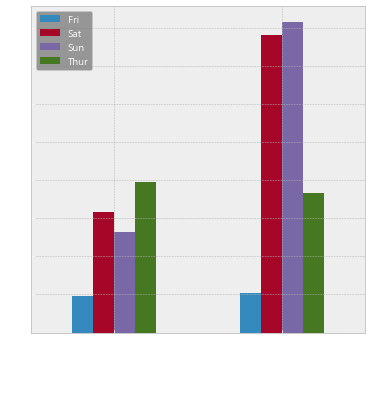

In [16]:
tips.pivot_table(index='sex', columns='day', values='size', aggfunc='sum').plot.bar(figsize=(6,6))
plt.legend(loc='upper left')
plt.show()

## 파이차트

<AxesSubplot:ylabel='day'>

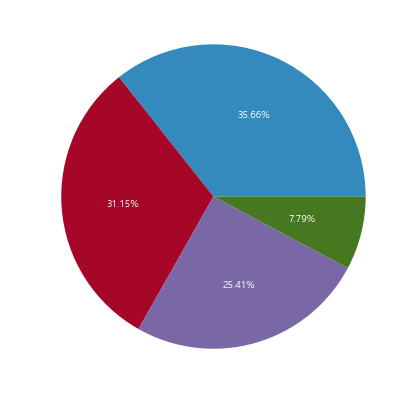

In [17]:
tips['day'].value_counts().plot.pie(figsize=(7,7), autopct='%.2f%%')

<AxesSubplot:ylabel='tip'>

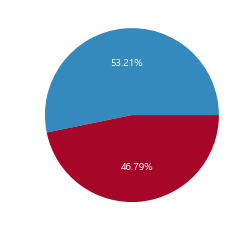

In [21]:
tips.groupby('time')['tip'].mean().plot(kind='pie', autopct='%.2f%%')

## 히스토그램, KDE(밀도그래프)

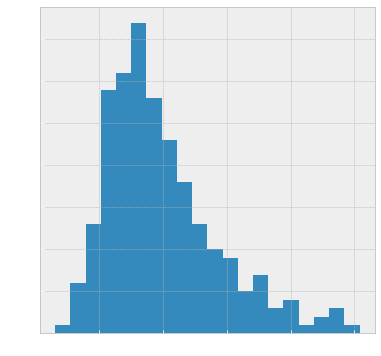

In [23]:
# tips['total_bill'].plot.hist(figsize=(6,6), bins=20)
tips['total_bill'].plot(kind='hist', figsize=(6,6), bins=20)
plt.show()

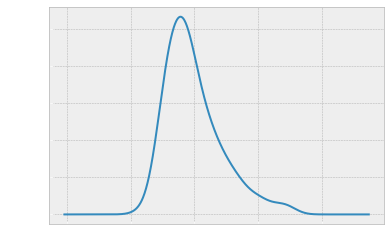

In [24]:
tips['total_bill'].plot.kde()
plt.show()

## Boxplot (상자그래프)

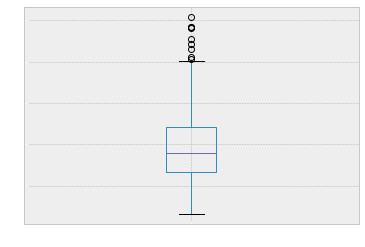

In [26]:
# Series
tips['total_bill'].plot.box()
plt.show()

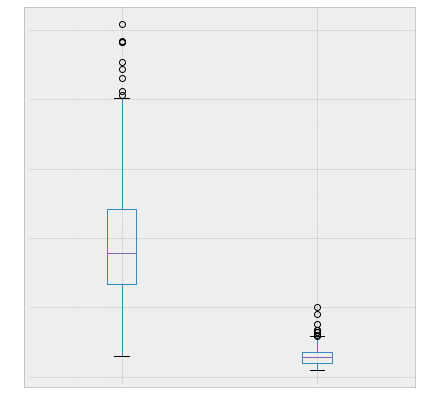

In [27]:
# DataFrame
tips[['total_bill','tip']].plot(kind='box', figsize=(7,7))
plt.show()

In [ ]:
tips.groupby('day')['total_bill']

## scatter plot (산점도) 

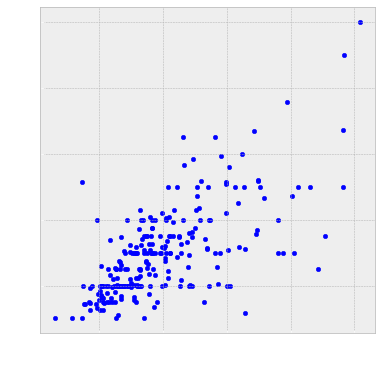

In [30]:
tips.plot(kind='scatter', x='total_bill', y='tip', figsize=(6,6)) # x에 올 컬럼명, y에 올 컬럼명
plt.show()

In [31]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


# 파이썬의 날짜/시간 다루기
- datetime 모듈
    - datetime 클래스 - 날짜/시간
    - date: 날짜
    - time: 시간

In [33]:
import datetime # module

In [36]:
c = datetime.datetime.now() # 현재일시를 datetime객체로 반환
c

datetime.datetime(2021, 3, 11, 15, 55, 19, 94260)

In [37]:
# 특정 일시
date = datetime.datetime(2000,4,5)
date

datetime.datetime(2000, 4, 5, 0, 0)

In [42]:
date2 = datetime.datetime(2010, 5, 20, 15, 32, 5)
date2 = datetime.datetime.now()
date2

datetime.datetime(2021, 3, 11, 16, 17, 11, 183738)

In [44]:
print(date2.year, date2.month, date2.day, date2.hour, date2.minute, date2.second)
print('요일:', date2.weekday()) # 0: 월요일 6: 일요일

2021 3 11 16 17 11
요일: 3


In [46]:
date2.isocalendar() # (년도, 주차, 요일) # 요일: 월-1, 일-7

(2021, 10, 4)

In [49]:
# datetime -> 문자열
# datetime.strftime('format문자열')
# %Y: 4자리 년도, %m: 월, %d: 일, %H: 시간(24), %M: 분, %S: 초
date2.strftime('%Y/%m/%d %H:%M:%S')

'2021/03/11 16:17:11'

In [52]:
# 문자열 -> datetime
# strptime
d = datetime.datetime.strptime("2020/10/20", '%Y/%m/%d')
d.day

20

# 판다스에서 datetime 사용

In [56]:
d = [datetime.datetime.now()] * 10
df = pd.DataFrame({
    'age':np.random.randint(10,100,10),
    'day':d
})
df.shape

(10, 2)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     10 non-null     int32         
 1   day     10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 248.0 bytes


In [60]:
df.head()

,age,day
0,92,2021-03-11 16:34:20.777620
1,11,2021-03-11 16:34:20.777620
2,65,2021-03-11 16:34:20.777620
3,31,2021-03-11 16:34:20.777620
4,20,2021-03-11 16:34:20.777620


dt accessor: datetime 타입의 값들을 처리하는 기능을 제공

In [63]:
# Series 타입: datatime64
df['day'].dt.year # 원소별로 날짜/시간에서 원하는 항목을 추출

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    2021
8    2021
9    2021
Name: day, dtype: int64

In [65]:
df['day'].dt.month

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: day, dtype: int64

In [66]:
# day: 일, hour: 시간, minute: 분, second:초
# week: 주
# dayofweek: 요일(0: 월 ~ 6: 일)
# dayofyear
# isocalendar() - (년, 주차, 요일) 1: 월 ~ 7: 일 => DataFrame

In [68]:
df['day'].dt.isocalendar()

,year,week,day
0,2021,10,4
1,2021,10,4
2,2021,10,4
3,2021,10,4
4,2021,10,4
5,2021,10,4
6,2021,10,4
7,2021,10,4
8,2021,10,4
9,2021,10,4


In [71]:
df['월'] = df['day'].dt.month
df

,age,day,월
0,92,2021-03-11 16:34:20.777620,3
1,11,2021-03-11 16:34:20.777620,3
2,65,2021-03-11 16:34:20.777620,3
3,31,2021-03-11 16:34:20.777620,3
4,20,2021-03-11 16:34:20.777620,3
5,10,2021-03-11 16:34:20.777620,3
6,34,2021-03-11 16:34:20.777620,3
7,39,2021-03-11 16:34:20.777620,3
8,70,2021-03-11 16:34:20.777620,3
9,50,2021-03-11 16:34:20.777620,3


In [73]:
df.groupby('월')['age'].mean()

월
3    42.2
Name: age, dtype: float64

In [76]:
# datetiem 타입의 index를 생성
# pd.date_range(시작날짜, freq='변화규칠', periods='개수') # 규칙적으로 증가/감소하는 datetime값을 가지는 index를 생성

In [81]:
pd.date_range('2000/1/1', freq='M', periods=5) # 2000/1/1부터 1개월씩 증가하는 날짜 5개 생성
pd.date_range('2000/1/1', freq='MS', periods=5)
pd.date_range('2000/1/1', freq='Y', periods=5)
pd.date_range('2000/1/1', freq='YS', periods=5)

# freq - 간격 지정 문자(Y: 년, M: 월, D: 일, H: 시간, T:분, S: 초)
#        YS, MS, HS, TS : 첫번째 날짜/시간. S생략: 마지막
# 문자 앞에 정수: 간격

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [85]:
pd.date_range('2000/1/1', freq='8D', periods=5)
pd.date_range('2000/1/1', freq='-7H', periods=5)

DatetimeIndex(['2000-01-01 00:00:00', '1999-12-31 17:00:00',
               '1999-12-31 10:00:00', '1999-12-31 03:00:00',
               '1999-12-30 20:00:00'],
              dtype='datetime64[ns]', freq='-7H')